In [109]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [129]:
import torchvision
from torchvision import datasets, transforms

batch_size = 128
lr = 0.0002

# data_loader
img_size = 64
transform = transforms.Compose([
#         transforms.Scale(img_size),
        transforms.ToTensor(),
#         transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
        transforms.Normalize(mean=[0.5], std=[0.5])
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [128]:
# list(train_loader)[0][0][0]
# transforms.Normalize?
nn.Module.__init__??

In [130]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 10, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(10 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [131]:
net = Net().float()
net.cuda()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [132]:
# import numpy as np
x = 10*np.random.randn(1,1,28,28).astype('f')
x = Variable(torch.from_numpy(x).cuda())
net(x)

Variable containing:
 0.4844 -0.4150 -0.1412 -0.0565 -0.1297 -0.2050 -0.0181 -0.0055  0.8308  0.6703
[torch.cuda.FloatTensor of size (1,10) (GPU 0)]

In [133]:
# net.double()
net(x)

Variable containing:
 0.4844 -0.4150 -0.1412 -0.0565 -0.1297 -0.2050 -0.0181 -0.0055  0.8308  0.6703
[torch.cuda.FloatTensor of size (1,10) (GPU 0)]

In [134]:
# create your optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
# criterion = nn.BCEWithLogitsLoss()
criterion = F.cross_entropy
# criterion = F.nll_loss


# # in your training loop:
# output = net(input)
# loss = criterion(output, target)
# optimizer.zero_grad()   # zero the gradient buffers
# loss.backward()
# optimizer.step()    # Does the update

In [84]:
# criterion(Variable(torch.FloatTensor([[-1000,-1000,-1000,-1000,-1000,1000,-1000,-1000,-1000,-1000]]).cuda()),Variable(torch.FloatTensor([[0,0,0,0,0,1,0,0,0,0]]).cuda()))
criterion(Variable(torch.FloatTensor([[-1000,-1000,-1000,-1000,-1000,1000,-1000,-1000,-1000,-1000]]).cuda()),Variable(torch.LongTensor([5]).cuda()))
# torch.FloatTensor([[0,0,0,0,1,0,0,0,0,0]])

Variable containing:
 0
[torch.cuda.FloatTensor of size (1,) (GPU 0)]

In [135]:
# import os, time
train_epoch = 20
print('training start!')
start_time = time.time()
for epoch in range(train_epoch):
    D_losses = []
    G_losses = []
    epoch_start_time = time.time()
    for x, y in train_loader:
        x,y = Variable(x.cuda()), Variable(y.cuda())
        output = net(x)
        loss = criterion(output,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    epoch_end_time = time.time()
    per_epoch_ptime = epoch_end_time - epoch_start_time
    print('[%d/%d] - ptime: %.2f, loss: %.3f' % ((epoch + 1), train_epoch, per_epoch_ptime,loss))

training start!
[1/20] - ptime: 3.21, loss: 2.193
[2/20] - ptime: 3.20, loss: 0.511
[3/20] - ptime: 3.20, loss: 0.346
[4/20] - ptime: 3.20, loss: 0.204
[5/20] - ptime: 3.19, loss: 0.216
[6/20] - ptime: 3.19, loss: 0.062
[7/20] - ptime: 3.18, loss: 0.201
[8/20] - ptime: 3.26, loss: 0.118
[9/20] - ptime: 3.24, loss: 0.101
[10/20] - ptime: 3.22, loss: 0.214
[11/20] - ptime: 3.25, loss: 0.117
[12/20] - ptime: 3.27, loss: 0.075
[13/20] - ptime: 3.21, loss: 0.174
[14/20] - ptime: 3.20, loss: 0.143
[15/20] - ptime: 3.19, loss: 0.034
[16/20] - ptime: 3.18, loss: 0.087
[17/20] - ptime: 3.19, loss: 0.111
[18/20] - ptime: 3.18, loss: 0.192
[19/20] - ptime: 3.21, loss: 0.024
[20/20] - ptime: 3.24, loss: 0.034


In [126]:
# list(iter(net.parameters()))

In [136]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=4, shuffle=True)

In [137]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for x, labels in train_loader:
    x,labels = Variable(x.cuda()), labels.cuda()
    outputs = net(x)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %d : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of 0 : 100 %
Accuracy of 1 : 97 %
Accuracy of 2 : 97 %
Accuracy of 3 : 94 %
Accuracy of 4 : 96 %
Accuracy of 5 : 98 %
Accuracy of 6 : 99 %
Accuracy of 7 : 97 %
Accuracy of 8 : 94 %
Accuracy of 9 : 96 %


In [101]:
# target=Variable(torch.LongTensor(3).random_(5))
# input = Variable(torch.randn(3, 5), requires_grad=True)
# criterion(input, target)
# list(train_loader)[0][1]
x=Variable(list(train_loader)[0][0][:].cuda())
np.argmax(net(x).cpu().detach().numpy())

995

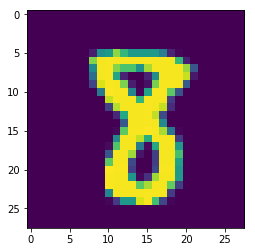

In [100]:
import matplotlib.pyplot as plt
plt.imshow(x.cpu().numpy()[0,0])

In [99]:
x.cpu().numpy().shape

(1, 1, 28, 28)

In [108]:
# import copy
import pickle
pickle.dump(net.state_dict(), open("trained_mnist_classifier.pkl","wb"))